In [2]:
library(readr)

ages <- read_csv("ages.csv")

head(ages)

Parsed with column specification:
cols(
  Movie = col_character(),
  Genre = col_character(),
  actor = col_character(),
  actor_age = col_integer(),
  actress = col_character(),
  actress_age = col_integer(),
  budget = col_double()
)


Movie,Genre,actor,actor_age,actress,actress_age,budget
Mo' Better Blues,drama,Denzel Washington,35,Joie Lee,28,10
Malcolm X,drama,Denzel Washington,37,Angela Bassett,34,34
The Preacher's Wife,drama,Denzel Washington,41,Whitney Houston,33,40
He Got Game,drama,Denzel Washington,43,Milla Jovovich,22,25
Remember the Titans,drama,Denzel Washington,45,Micole Ari Parker,29,30
Training Day,drama,Denzel Washington,46,Eva Mendes,27,45


In [17]:
library(ggplot2)

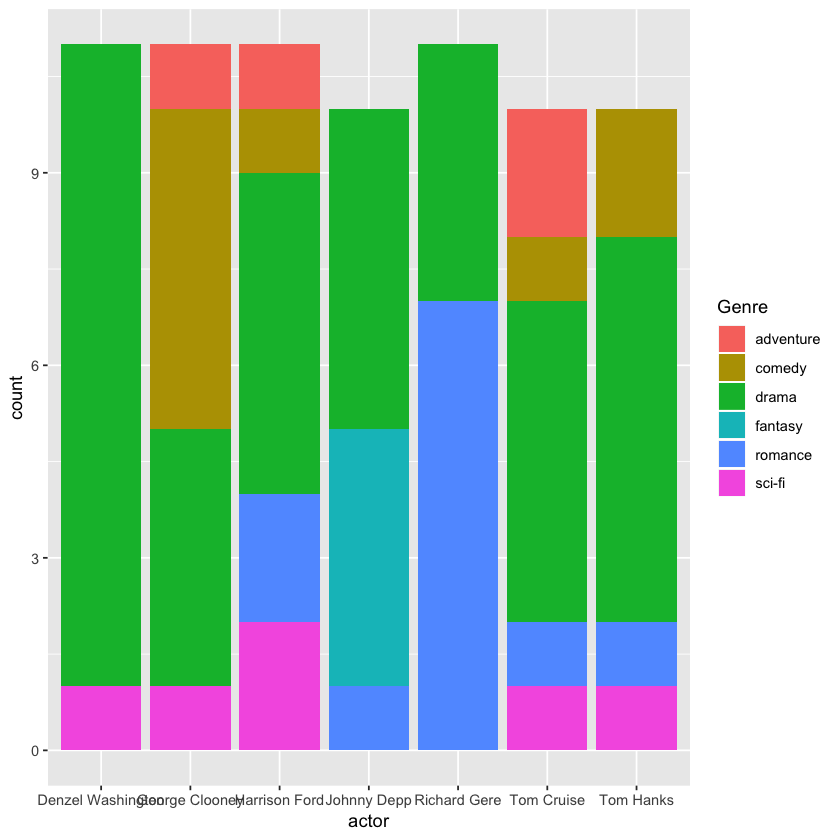

In [18]:
ggplot(data=ages,
  aes(x=actor, fill=Genre)) +
  geom_bar()

In [19]:
ggsave("actress_ages_colorbar.png", width=20, height=25, units="cm")

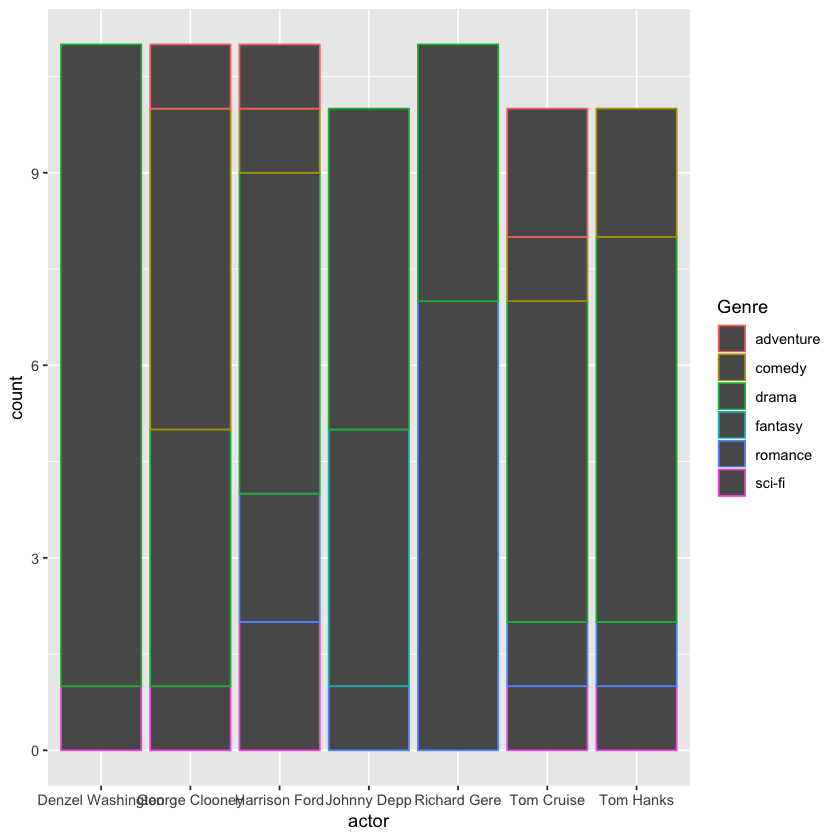

In [6]:
ggplot(data=ages,
  aes(x=actor, color=Genre)) +
  geom_bar()

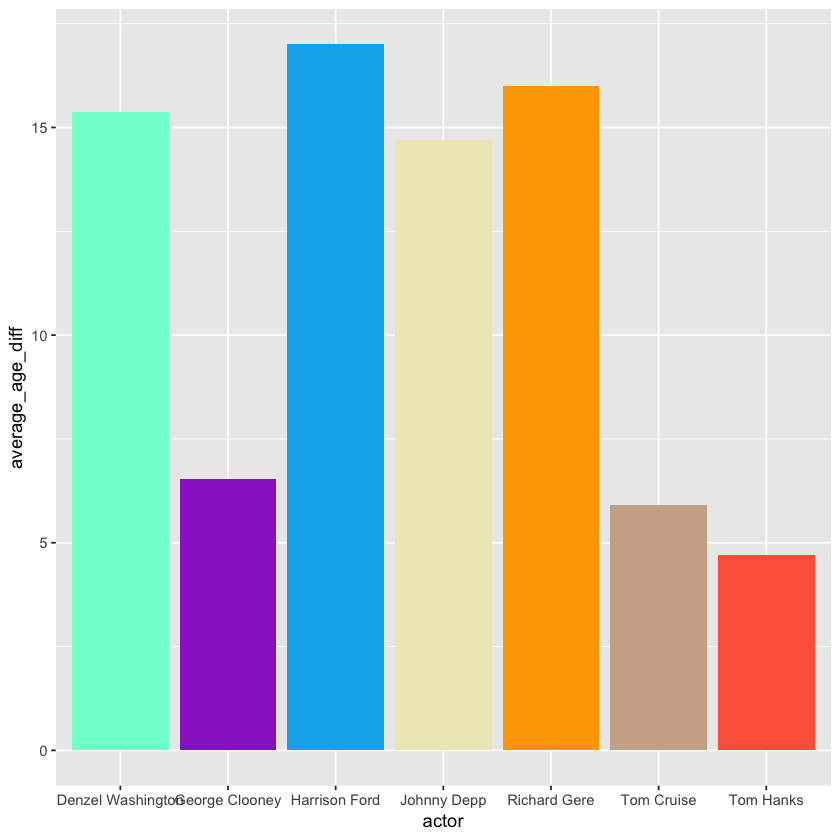

In [9]:
library(dplyr)

avg_age <- ages %>% 
  group_by(actor) %>%
  mutate(age_diff = actor_age-actress_age) %>% 
  summarize(average_age_diff = mean(age_diff))
ggplot(avg_age, aes(x=actor, y=average_age_diff, fill=actor)) + 
  geom_bar(stat="identity") +
  theme(legend.position="none") + # This removes the legend
  scale_fill_manual(values=c("aquamarine", "darkorchid", "deepskyblue2", "lemonchiffon2", "orange", "peachpuff3", "tomato"))

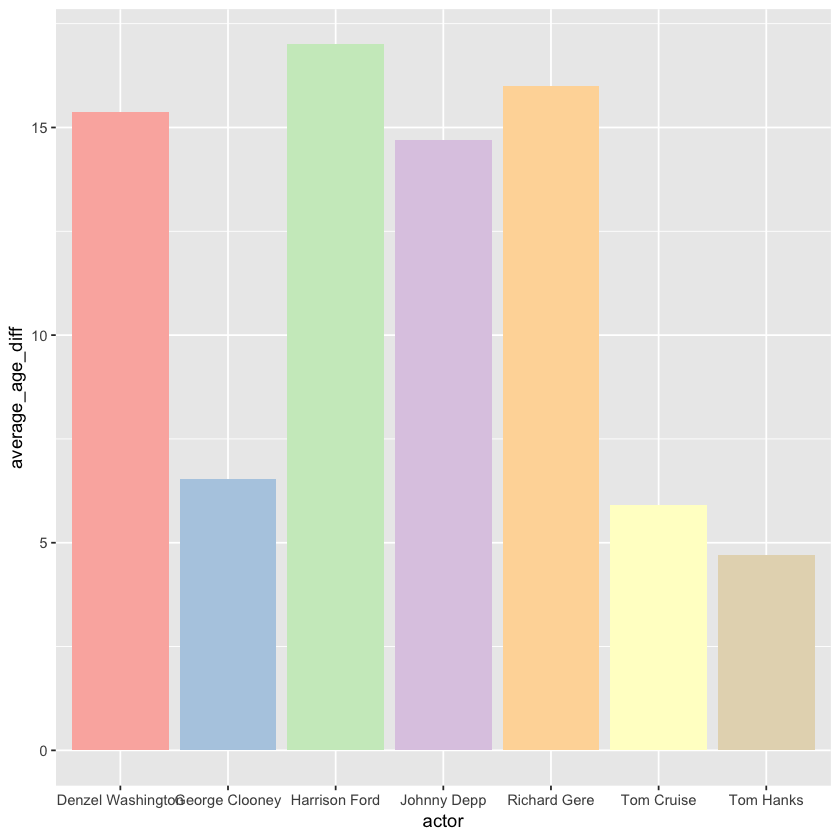

In [10]:
ggplot(avg_age, aes(x=actor, y=average_age_diff, fill=actor)) + 
  geom_bar(stat="identity") +
  theme(legend.position="none") + 
  scale_fill_brewer(palette="Pastel1")

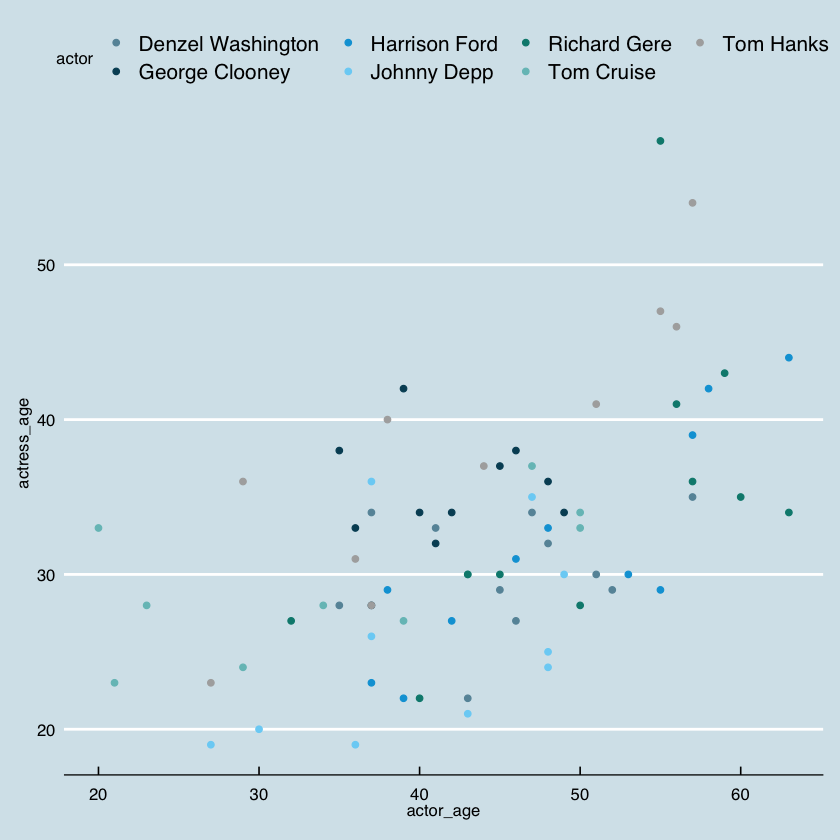

In [20]:
library(ggthemes)
ggplot(ages, aes(x=actor_age, y=actress_age, color=actor)) + 
  geom_point() +
  theme_economist() +
  scale_colour_economist()

In [21]:
ggsave("actress_ages_colordots.png", width=20, height=25, units="cm")

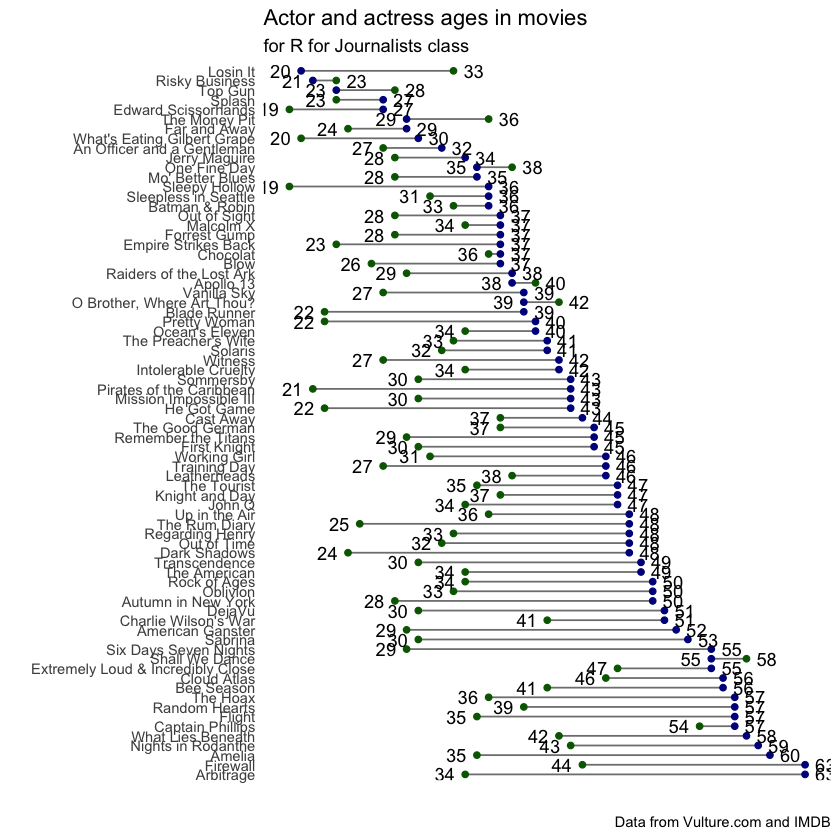

In [13]:
library(forcats)
library(dplyr)

ages_reordered <- ages %>% 
  mutate(Movie=fct_reorder(Movie, desc(actor_age)))

ggplot(ages_reordered) +
  geom_segment(
       aes(x = actress_age,
           y = Movie,
           xend = actor_age,
           yend = Movie),
           color = "gray50") +
  geom_point(aes(x=actress_age, y=Movie), color="dark green") +
  geom_point(aes(x=actor_age, y=Movie), color="dark blue") +
  labs(x="", y="", 
       title = "Actor and actress ages in movies",
       subtitle = "for R for Journalists class",
       caption = "Data from Vulture.com and IMDB") +
  theme_minimal() +
  geom_text(aes(x=actress_age, y=Movie, label=actress_age), hjust=ifelse(ages$actress_age<ages$actor_age, 1.5, -.5)) +
  geom_text(aes(x=actor_age, y=Movie, label=actor_age), hjust=ifelse(ages$actress_age<ages$actor_age, -.5, 1.5)) +
  theme(panel.border = element_blank(), 
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), 
        axis.line = element_blank(),
        axis.text.x = element_blank())

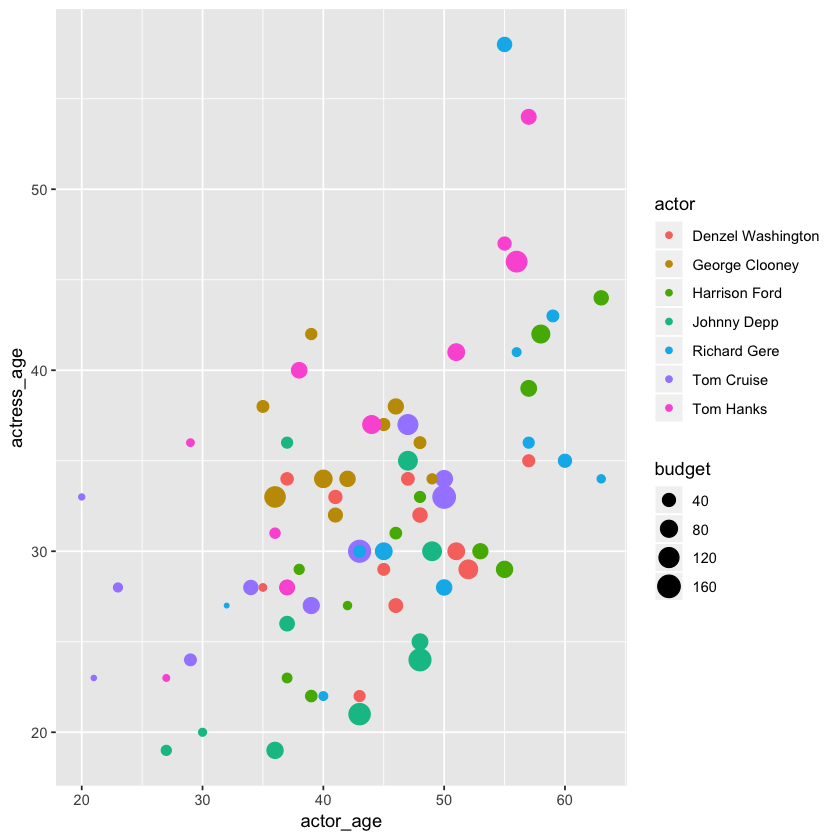

In [22]:
ggplot(data=ages,
       aes(x=actor_age,
           y=actress_age,
           color=actor,
           size=budget)) +
  geom_point()

In [23]:
ggsave("actress_ages_colorpoints.png", width=20, height=25, units="cm")